In [1]:
# Import

import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd


Generate data

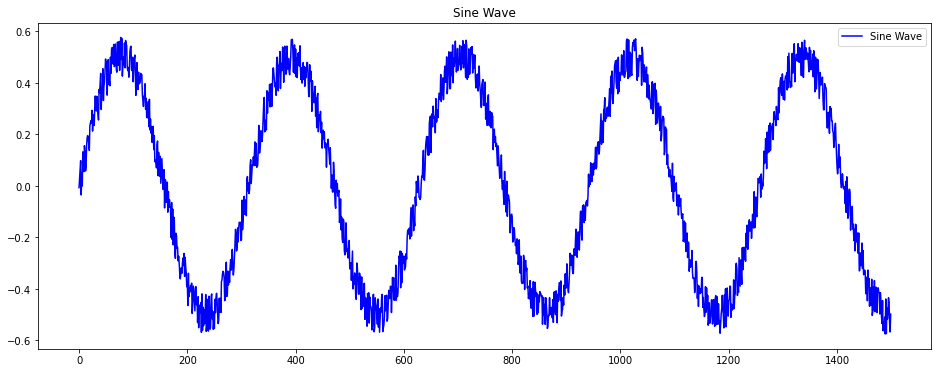

In [26]:
# Sine Signal

N = 1500
t = np.arange(0, N)

data_sine = np.sin(t * 0.02) / 2 + np.random.uniform(-0.08, 0.08, N)
plt.figure(figsize=(16, 6))
plt.plot(data_sine, 'b', label='Sine Wave')

plt.title("Sine Wave")
plt.legend()


In [4]:
# Sampeling and Convert Signal to Dataset
# Step is Hyperparameter

def convertSignalToDataset(signal, step):
  X = []
  Y = []

  for i in range(len(signal) - step):
    
    j = i + step
    X.append(signal[i:j])
    Y.append(signal[j])

  return np.array(X), np.array(Y)

In [ ]:
# Seperate Test and Train

step = 10

train = data_sine[:1000]
test = data_sine[1000:]

X_train, Y_train = convertSignalToDataset(train, step)
X_test, Y_test = convertSignalToDataset(test, step)

X_train.shape, X_test.shape

In [ ]:
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

X_train.shape, X_test.shape

### RNN
#### Define Model, Fit and Compile

In [7]:
# Define Model

rnn_model = tf.keras.models.Sequential([
          layers.SimpleRNN(units=64, input_shape=(None, 1)),
          layers.Dense(1)
])

In [8]:
rnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.MSE)

In [ ]:
rnn_model.fit(X_train, Y_train, epochs=100, batch_size=16)

### GRU
#### Define Model, Fit and Compile

In [10]:
# Define Model

gru_model = tf.keras.models.Sequential([
          layers.GRU(units=64, input_shape=(None, 1)),
          layers.Dense(1)
])

In [11]:
gru_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.MSE)

In [ ]:
gru_model.fit(X_train, Y_train, epochs=100, batch_size=16)

### Evaluate and Predict
#### Comparision of RNN and GRU

In [13]:
# Evaluate

rnn_eval = rnn_model.evaluate(X_test, Y_test)
gru_eval = gru_model.evaluate(X_test, Y_test)

print("RNN Evaluation: ", rnn_eval)
print("GRU Evaluation: ", gru_eval)

16/16 [==============================] - 0s 2ms/step - loss: 0.0027
RNN Evaluation:  0.0027837613597512245
GRU Evaluation:  0.0026822988875210285


In [14]:
# Predict

rnn_train_predict = rnn_model.predict(X_train)
rnn_test_predict = rnn_model.predict(X_test)

gru_train_predict = gru_model.predict(X_train)
gru_test_predict = gru_model.predict(X_test)

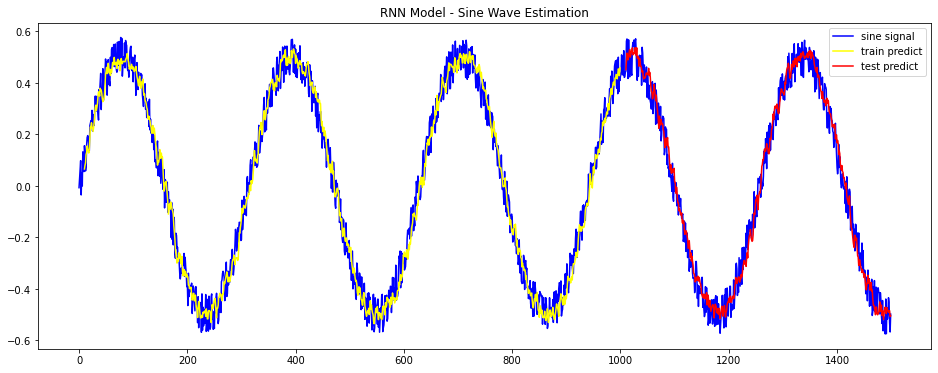

In [28]:
#RNN prediction Plot

plt.figure(figsize=(16, 6))
plt.plot(data_sine, 'blue', label='sine signal')

# shift train predictions for plotting
trainPredictPlot = np.empty_like(data_sine)
trainPredictPlot[:] = np.nan
trainPredictPlot[step:len(rnn_train_predict)+step] = rnn_train_predict[:, 0]

# shift test predictions for plotting
testPredictPlot = np.empty_like(data_sine)
testPredictPlot[:] = np.nan
testPredictPlot[len(rnn_train_predict)+(step*2):len(data_sine)] = rnn_test_predict[:, 0]

plt.plot(trainPredictPlot, 'yellow', label='train predict')
plt.plot(testPredictPlot, 'red', label='test predict')

plt.title("RNN Model - Sine Wave Estimation")
plt.legend()


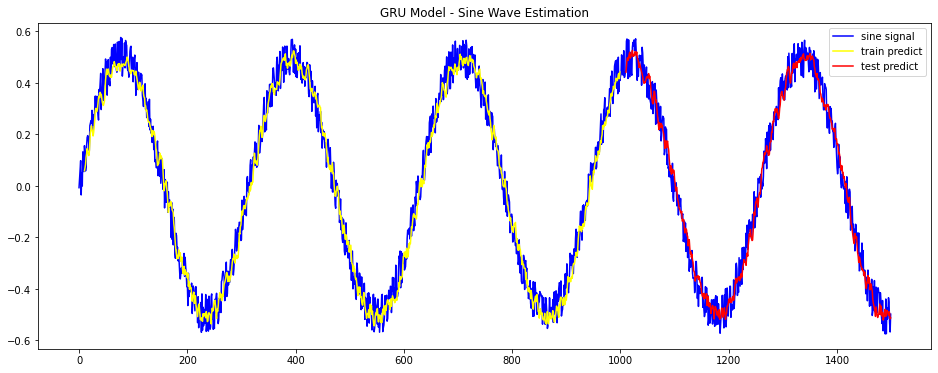

In [29]:
#GRU prediction Plot

plt.figure(figsize=(16, 6))
plt.plot(data_sine, 'blue', label='sine signal')

# shift train predictions for plotting
trainPredictPlot = np.empty_like(data_sine)
trainPredictPlot[:] = np.nan
trainPredictPlot[step:len(gru_train_predict)+step] = gru_train_predict[:, 0]

# shift test predictions for plotting
testPredictPlot = np.empty_like(data_sine)
testPredictPlot[:] = np.nan
testPredictPlot[len(gru_train_predict)+(step*2):len(data_sine)] = gru_test_predict[:, 0]

plt.plot(trainPredictPlot, 'yellow', label='train predict')
plt.plot(testPredictPlot, 'red', label='test predict')

plt.title("GRU Model - Sine Wave Estimation")
plt.legend()